# ANALISANDO NOTAS NO "ENEM" AMERICANO EM ESCOLAS DE NOVA YORK

![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Todos os anos, estudantes do ensino médio nos Estados Unidos fazem o SAT, um exame padronizado destinado a medir habilidades de leitura, matemática e escrita. O teste possui três seções – leitura, matemática e escrita – cada uma com pontuação máxima de 800 pontos. Esses exames são extremamente importantes para os alunos e as universidades, pois desempenham um papel crucial no processo de admissão.

Analisar o desempenho das escolas é fundamental para diversos interessados, incluindo profissionais da educação, pesquisadores, autoridades governamentais e até mesmo pais que desejam escolher a melhor escola para seus filhos.

Vamos utilizar um conjunto de dados chamado schools.csv, uma prévia dele está disponível abaixo.

Vamos responder a três questões-chave sobre o desempenho das escolas públicas de Nova York (NYC) no SAT.

In [90]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


# Quais escolas de NYC têm os melhores resultados em matemática?

In [91]:
best_math_schools = schools[['school_name', 'average_math']]
best_math_schools = best_math_schools[best_math_schools['average_math']>640]
best_math_schools = best_math_schools.sort_values(by='average_math', ascending=False)


best_math_schools.head(10)

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


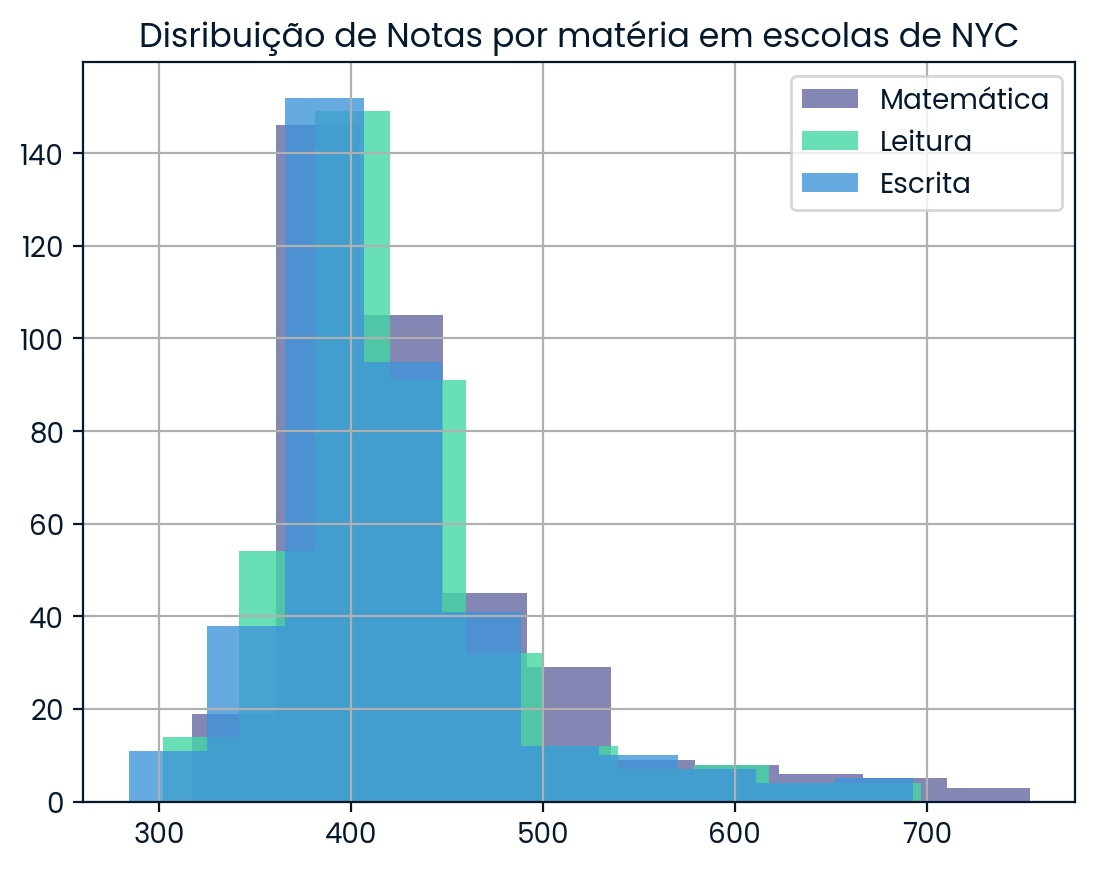

In [92]:
import matplotlib.pyplot as plt


schools['average_math'].hist(alpha=0.8, label='Matemática')
schools['average_reading'].hist(alpha=0.8, label='Leitura')
schools['average_writing'].hist(alpha=0.8, label='Escrita')
plt.legend()
plt.title('Disribuição de Notas por matéria em escolas de NYC')
plt.show()


# Quais são as 10 melhores escolas com base nas notas combinadas do SAT?

In [93]:
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']
top_10_schools = schools.sort_values(by = 'total_SAT', ascending = False).head(10)
top_10_schools = top_10_schools[['school_name', 'total_SAT']]
top_10_schools.head(10)

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


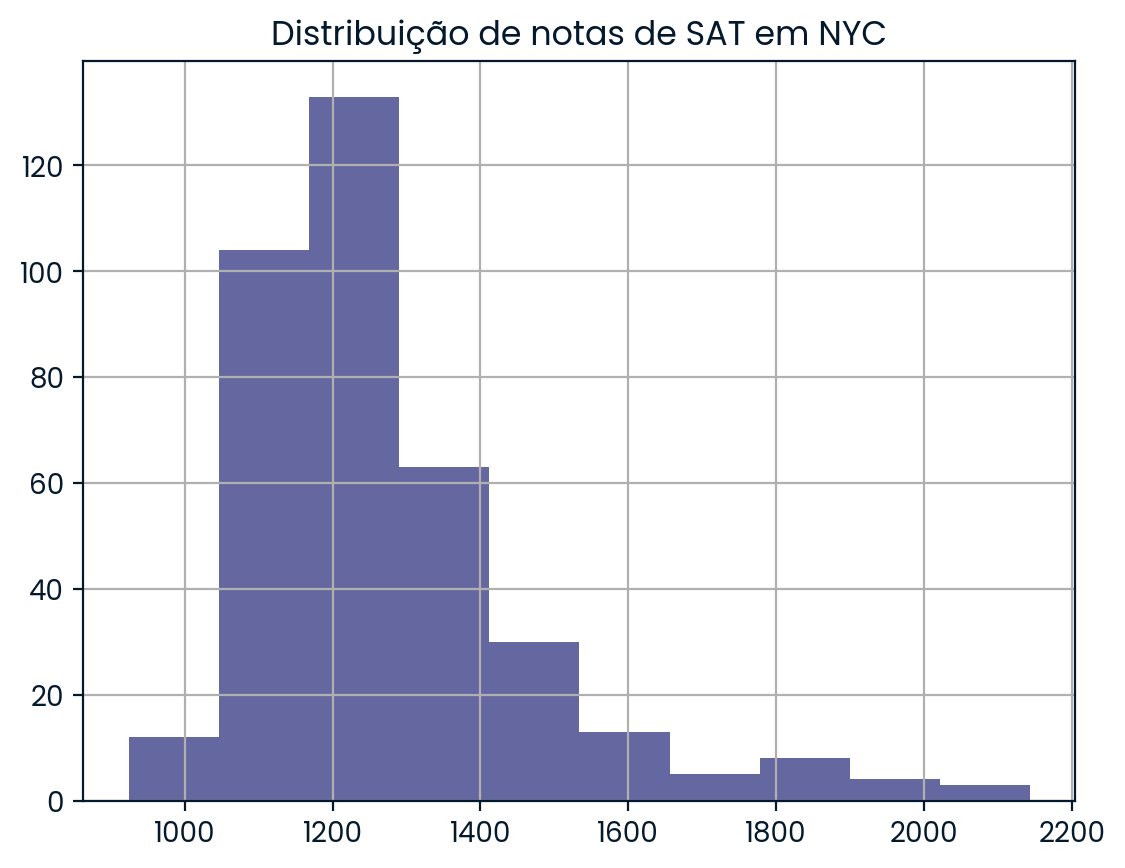

In [94]:
schools['total_SAT'].hist()
plt.title('Distribuição de notas de SAT em NYC')
plt.show()

# Qual DISTRITO tem o maior desvio padrão nas notas combinadas do SAT?

In [95]:


borough_stats = schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std'])
largest_std_borough = borough_stats['std'].idxmax()
largest_std_dev = pd.DataFrame({
    'borough': [largest_std_borough],
    'num_schools': [borough_stats.loc[largest_std_borough, 'count']],
    'average_SAT': [round(borough_stats.loc[largest_std_borough, 'mean'], 2)],
    'std_SAT': [round(borough_stats.loc[largest_std_borough, 'std'], 2)]
})

# Display the result
largest_std_dev

,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89,1340.13,230.29
